In [1]:
using LinearAlgebra
using Plots

In [3]:
X1 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
X2 = [1, 1, -1, 1, -1, 1, 1, 1, -1, 1]
X3 = [1, -1, 1, 1, -1, 1, 1, -1, 1, 1]

X = [X1'; X2'; X3']
println(size(X1))
X

(10,)


3×10 Matrix{Int64}:
 1   1   1  1   1  1  1   1   1  1
 1   1  -1  1  -1  1  1   1  -1  1
 1  -1   1  1  -1  1  1  -1   1  1

In [4]:
# Generate a 4x10 matrix with random values of +1 and -1
X = rand([-1, 1], 3, 100)

# Print the matrix
println("Random Matrix (10x4):")
display(X)

3×100 Matrix{Int64}:
  1  1  -1   1  -1  -1  -1  -1   1  1  …   1   1   1   1  -1  -1   1   1  1
 -1  1   1  -1   1  -1   1  -1  -1  1     -1  -1   1  -1  -1   1  -1   1  1
  1  1  -1  -1   1   1   1  -1   1  1      1   1  -1  -1  -1   1   1  -1  1

Random Matrix (10x4):


In [5]:
function set_W(X)
  W =  transpose(X) * X
  K = diagm(diag(W))
  return W - K #zerar a diagonal principal

end

set_W(X)

100×100 Matrix{Int64}:
  0   1  -3   1  -1   1  -1  -1   3  …   3   3  -1   1  -1  -1   3  -1   1
  1   0  -1  -1   1  -1   1  -3   1      1   1   1  -1  -3   1   1   1   3
 -3  -1   0  -1   1  -1   1   1  -3     -3  -3   1  -1   1   1  -3   1  -1
  1  -1  -1   0  -3  -1  -3   1   1      1   1   1   3   1  -3   1   1  -1
 -1   1   1  -3   0   1   3  -1  -1     -1  -1  -1  -3  -1   3  -1  -1   1
  1  -1  -1  -1   1   0   1   1   1  …   1   1  -3  -1   1   1   1  -3  -1
 -1   1   1  -3   3   1   0  -1  -1     -1  -1  -1  -3  -1   3  -1  -1   1
 -1  -3   1   1  -1   1  -1   0  -1     -1  -1  -1   1   3  -1  -1  -1  -3
  3   1  -3   1  -1   1  -1  -1   0      3   3  -1   1  -1  -1   3  -1   1
  1   3  -1  -1   1  -1   1  -3   1      1   1   1  -1  -3   1   1   1   3
  ⋮                   ⋮              ⋱                   ⋮              
  3   1  -3   1  -1   1  -1  -1   3      0   3  -1   1  -1  -1   3  -1   1
  3   1  -3   1  -1   1  -1  -1   3      3   0  -1   1  -1  -1   3  -1   1
 -1 

In [7]:
function set_RecordationS(W, X)
  Y = copy(X)
  for i=1:length(X)
    aux = sign(dot(W[i,:],Y))
    if aux!=0
      Y[i] = aux
    end
    #println("Energia = ",set_Energy(Y, W))
  end
  return Y
end

set_RecordationS (generic function with 1 method)

In [8]:
  function recursive_recordation(W, y_r_actual, yr_last = zeros(length(y_r_actual[:,])) , current_interation = 1, max_iterations = 101)
    if (((norm(yr_last - y_r_actual)==0) || (current_interation == max_iterations)) && current_interation!= 1)
      return y_r_actual, current_interation

    end
    yr_last = copy(y_r_actual)
    y_r_actual = set_RecordationS(W, y_r_actual)
    #println("---")
    return recursive_recordation(W, y_r_actual, yr_last, current_interation + 1)
  end

recursive_recordation (generic function with 4 methods)

In [9]:
function set_Energy(X, W)
  return  -1/2*(transpose(X))*W*X
end

set_Energy (generic function with 1 method)

In [10]:
W = set_W(X)
#input = [-1, 1, -1, 1, -1, 1, 1, -1, 1, 1]
input = rand([-1, 1], 100,)
y_r = recursive_recordation(W, input);
# print(y_r)



([-1, 1, 1, -1, 1, -1, 1, -1, -1, 1  …  -1, -1, -1, 1, -1, -1, 1, -1, 1, 1], 4)

In [11]:
length(input[:])

100

In [12]:
length(W)

10000

# Cálculo da probabilidade

Primeiro, iremos aproximar a binominal pela gaussiana

Por meio de contas, cheguei de que a aproximação da binominal, no modelo de Hopfield, é \frac{(1-n)}{\sqrt(n-1)(p-1)}

In [13]:
function binomial_to_normal_Hopfield_05(n, p)
  return ((1-n)/sqrt((n-1)*(p-1)))
end

binomial_to_normal_Hopfield_05 (generic function with 1 method)

In [14]:
n = length(W[:,1])
p = length(X[:,1])

3

In [15]:
using Distributions

In [16]:
z = binomial_to_normal_Hopfield_05(1000, 500)

probability = cdf(Normal(0, 1), z)

println("A probabilidade aproximada é: ", 1 - probability)

A probabilidade aproximada é: 0.9214543032217999


In [17]:
n = 28*28
Plist = 1:Int(ceil(0.2*n))
Pr_one = zeros(length(Plist))
Pr_all = zeros(length(Plist))
for (i,p) in enumerate(Plist)
  z = binomial_to_normal_Hopfield_05(n, p)
  Pr_one[i] = (1-cdf(Normal(0,1),z))^n
  Pr_all[i] = (1-cdf(Normal(0,1),z))^(n*p)
end

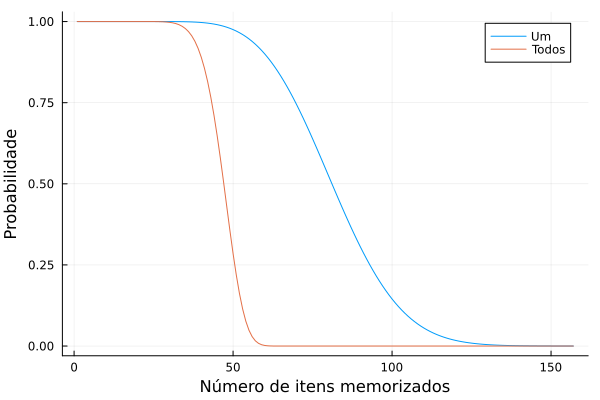

In [18]:
plot(Plist, Pr_one, label="Um", xlabel="Número de itens memorizados", ylabel="Probabilidade")
plot!(Plist, Pr_all, label="Todos")
#a = findall(x -> x >= 0.99, Pr_all)[end]
#plot!([a,a],[0,1],label="oi")

#Exemplo do relatório

In [19]:
X1 = [1, 1, -1, 1, -1]
X2 = [1, 1, 1 , 1 ,1]
X = [X1', X2']


2-element Vector{Adjoint{Int64, Vector{Int64}}}:
 adjoint([1, 1, -1, 1, -1])
 adjoint([1, 1, 1, 1, 1])

In [20]:
W = set_W(X)
x = [-1, 1, -1, 1, -1]
x_r = recursive_recordation(W, x)

([1, 1, -1, 1, -1], 3)

In [21]:
x_r

([1, 1, -1, 1, -1], 3)

# Recordação MNIST


In [22]:
using MLDatasets
using Images

Coletando as imagens da biblioteca

In [ ]:

train_x_raw, train_y = MNIST(split=:train)[:]

train_x = Float64.(train_x_raw)


num_images_to_load = 50000
selected_images = train_x[:, :, 1:num_images_to_load]
selected_labels = train_y[1:num_images_to_load]

println("Formato dos dados carregados: ", size(selected_images))
println("Rótulos das imagens carregadas: ", selected_labels)




Formato dos dados carregados: (28, 28, 50000)
Rótulos das imagens carregadas: [5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2, 9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4, 5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6, 1, 9, 9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5, 9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7, 4, 9, 7, 8, 3, 2, 1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3, 0, 4, 6, 5, 2, 6, 4, 7, 1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4, 6, 5, 8, 6, 3, 7, 5, 8, 0, 9, 1, 0, 3, 1, 2, 2, 3, 3, 6, 4, 7, 5, 0, 6, 2, 7, 9, 8, 5, 9, 2, 1, 1, 4, 4, 5, 6, 4, 1, 2, 5, 3, 9, 3, 9, 0, 5, 9, 6, 5, 7, 4, 1, 3, 4, 0, 4, 8, 0, 4, 3, 6, 8, 7, 6, 0, 9, 7, 5, 

In [137]:
i = 1
NUM_REPETICOES = 1
pos = Vector{Int}()
val = zeros(Int, 10)
X = Matrix{Int}(undef, 0, 28*28)
while true #Aqui vamos pegar uma imagem de cada algarismo e salvar no nosso conjunto de memórias fundamentais
    num = selected_labels[i]
    if val[num + 1] < NUM_REPETICOES && val[num+1] > -1
        val[num + 1]+=1 
        push!(pos, i)
        img = selected_images[:, :, i]
        img = reshape(img, (1, 28*28))
        thereshold = 0.5
        img = (img.>thereshold) .* 2 .- 1
        X = vcat(X, img)
    else
        val[num + 1] = -1
    end
    if sum(val) == -10
        break
    end
    i+=1

end


Testando ver se armazenei corretamente o conjunto das memórias fundamentais

In [25]:
number_selected = 2
W_real = set_W(X)
thereshold = 0.5
input = selected_images[:,:, number_selected]
input = reshape(input, (28*28))
input = (input.>thereshold).* 2 .- 1

y_r = recursive_recordation(W_real, input)
y_r = y_r[1]




784-element Vector{Int64}:
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
  ⋮
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1

In [28]:
size(X)

(500, 784)

Imagem original

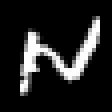

In [136]:
y_original = selected_images[:,:,1]
y_original = colorview(Gray, y_original)
display(y_original)

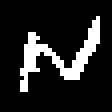

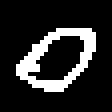

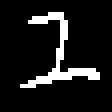

In [191]:
for i in 1:3
    image = X[i,:,:,1]
    image = (image .+1) / 2
    image = colorview(Gray, image)
    image = reshape(image, (28,28))
    display(image)
    if i == 10
        save("MNIST1.png",image)
    end
end

Vamos fazer a recordação que está no relatório, vamos usar como entrada o número 1

784×1 Matrix{Int64}:
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
  ⋮
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1

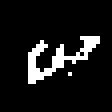

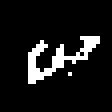

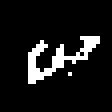

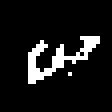

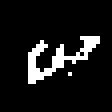

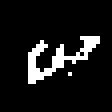

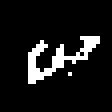

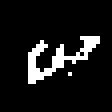

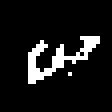

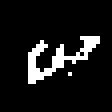

In [224]:
for i in 1:10
    input = X[i,:,:,1]
    input = reshape(input, (784, 1))
    W = set_W(X)
    yr = recursive_recordation(W, input)
    yr = yr[1]
    yr = (yr .+1) /2
    yr = colorview(Gray, yr)
    yr = reshape(yr, (28,28))
    display(yr)

end

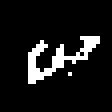

In [238]:
y_original = selected_images[:,:,999]
thereshold = 0.5
input = (input .> thereshold *2) .-1
yr = recursive_recordation(W, input)
yr = yr[1]
yr = (yr .+1) / 2
yr = colorview(Gray, yr)
yr = reshape(yr, (28,28))
display(yr)




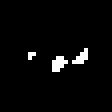

In [30]:
y_r = reshape(y_r, (28,28))
y_r = (y_r .+ 1) ./ 2
y_r = colorview(Gray, y_r)
display(y_r)

    Deu errado, agora, vamos calcular a probabilidade de termos digitos 1 e -1 na rede

In [31]:
total_el = length(X)
num_pos = sum(X .== 1)

prob = num_pos / total_el

0.12969897959183674

In [32]:
function binomial_to_normal_Hopfield_generic(n, p, pr)
    
    numerador = (n-1) * ( (p-1)*(1-2pr) - 1 )
    
    denominador = 2 * sqrt( (n-1) * (p-1) * pr * (1-pr) )
    
    return numerador / denominador
end

binomial_to_normal_Hopfield_generic (generic function with 1 method)

In [33]:
Plist = 1:Int(ceil(3))
Pr_one = zeros(length(Plist))
Pr_all = zeros(length(Plist))
for (i,p) in enumerate(Plist)
  z = binomial_to_normal_Hopfield_generic(n, p, prob)
  Pr_one[i] = (1-cdf(Normal(0,1),z))^n
  Pr_all[i] = (1-cdf(Normal(0,1),z))^(n*p)
end

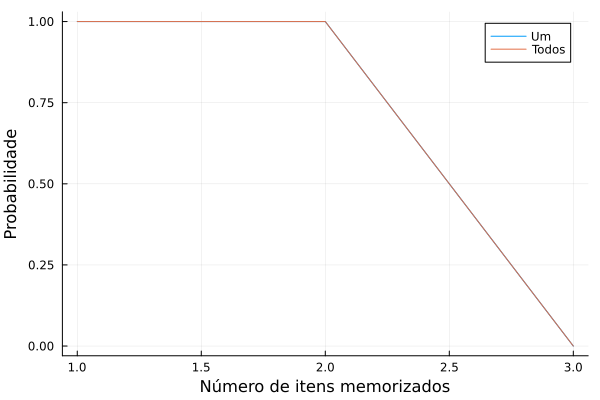

In [34]:
plot(Plist, Pr_one, label="Um", xlabel="Número de itens memorizados", ylabel="Probabilidade")
plot!(Plist, Pr_all, label="Todos")

Será que o erro do armazenamento está no cálculo da matriz W ou tem algo a mais

In [35]:
function set_pseudoinverse_W(X)
    pseu = pinv(X)
    W_ps = pseu * X 
    K = diagm(diag(W_ps))
    return W_ps - K
end

set_pseudoinverse_W (generic function with 1 method)

In [36]:
input = selected_images[:,:, 101]
input = reshape(input, (28*28))
input = (input.>thereshold).* 2 .- 1
W_ps = set_pseudoinverse_W(X)
y_r_ps = recursive_recordation(W_ps, input)
print(y_r_ps[2])
y_r_ps = y_r_ps[1]




2

784-element Vector{Int64}:
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
  ⋮
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1

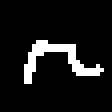

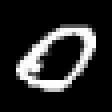

In [37]:
y_r_ps = (y_r_ps .+ 1) ./ 2
y_r_ps = colorview(Gray, y_r_ps)
y_r_ps = reshape(y_r_ps, (28, 28))
display(y_r_ps)

y_original = selected_images[:,:,number_selected]
y_original = colorview(Gray, y_original)
display(y_original)

Aqui, vemos que a recordação funcionou para a pseudoinversa. Vou testar uma entrada fora do conjunto de memórias fundamentais

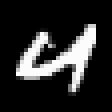

In [168]:
input = selected_images[: ,:, 2011]
input = reshape(input, (28*28))
img_original = copy(input)
input = (input.>thereshold) *2 .-1
img_original = reshape(img_original, (28,28))
img_original = colorview(Gray, img_original)
display(img_original)


Pegamos um 4. Vamos fazer a recordação

In [40]:
W = set_pseudoinverse_W(X)






784×784 Matrix{Float64}:
 0.0         0.00400163  0.00400163  …  0.00400163  0.00400163  0.00400163
 0.00400163  0.0         0.00400163     0.00400163  0.00400163  0.00400163
 0.00400163  0.00400163  0.0            0.00400163  0.00400163  0.00400163
 0.00400163  0.00400163  0.00400163     0.00400163  0.00400163  0.00400163
 0.00400163  0.00400163  0.00400163     0.00400163  0.00400163  0.00400163
 0.00400163  0.00400163  0.00400163  …  0.00400163  0.00400163  0.00400163
 0.00400163  0.00400163  0.00400163     0.00400163  0.00400163  0.00400163
 0.00400163  0.00400163  0.00400163     0.00400163  0.00400163  0.00400163
 0.00400163  0.00400163  0.00400163     0.00400163  0.00400163  0.00400163
 0.00400163  0.00400163  0.00400163     0.00400163  0.00400163  0.00400163
 ⋮                                   ⋱                          
 0.00400163  0.00400163  0.00400163  …  0.00400163  0.00400163  0.00400163
 0.00400163  0.00400163  0.00400163     0.00400163  0.00400163  0.00400163
 0.0040016

6

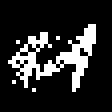

In [41]:
yr = recursive_recordation(W, input)
print(yr[2])
yr = yr[1]
yr= (yr .+1) ./2
yr = reshape(yr, (28, 28))
colorview(Gray, yr)

In [42]:
input

784-element Vector{Int64}:
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
  ⋮
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1

Por isso, vamos testar uma outra abordagem, inverter as cores de todo o conjunto das memórias fundamentais

In [43]:
i = 1
NUM_REPETICOES = 3
pos = Vector{Int}()
val = zeros(Int, 10)
X = Matrix{Int}(undef, 0, 28*28)
while true
    num = selected_labels[i]
    if val[num + 1] < NUM_REPETICOES && val[num+1] > -1
        val[num + 1]+=1 
        push!(pos, i)
        img = selected_images[:, :, i]
        img = reshape(img, (1, 28*28))
        thereshold = 0.5
        img = (img.>thereshold) .* 2 .- 1
        img = -img
        X = vcat(X, img)
    else
        val[num + 1] = -1
    end
    if sum(val) == -10
        break
    end
    i+=1
end


In [45]:
total_el = length(X)
num_pos = sum(X .== 1)

prob = num_pos / total_el

0.8755527210884354

In [46]:
Plist = 1:Int(ceil(0.2 * n))
Pr_one = zeros(length(Plist))
Pr_all = zeros(length(Plist))
for (i,p) in enumerate(Plist)
  z = binomial_to_normal_Hopfield_generic(n, p, prob)
  Pr_one[i] = (1-cdf(Normal(0,1),z))
  Pr_all[i] = (1-cdf(Normal(0,1),z))^(n*p)
end

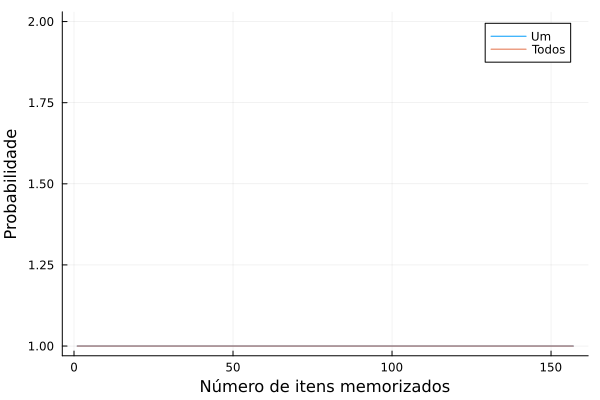

In [47]:
plot(Plist, Pr_one, label="Um", xlabel="Número de itens memorizados", ylabel="Probabilidade")
plot!(Plist, Pr_all, label="Todos")



#Teste com amostras aleatórias com a prob do mnist
Basicamente é fazer o teste com 100 matrizes aleatórias e ver a probabilidade e revisar o cálculo do relatório

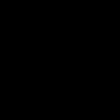

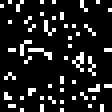

In [48]:
#fazendo com os dados do mnist, mas se prob = 0.5, vemos que recordamos perfeitamente
prob = 0.1244472789115646
X = 2*(rand(10,28*28).<=prob).-1
linha = X[1, :]
W = set_W(X)
yr = set_RecordationS(W, linha)

    new_y = (yr.+1)/2
    new_y = reshape(new_y, (28,28))
    new_y = colorview(Gray, new_y)
    display(new_y)

    old_y = (linha.+1) /2
    old_y = reshape(old_y, (28,28))
    old_y = colorview(Gray, old_y)
    display(old_y)






Por isso, vamos fazer um teste com prob = 0.5

In [49]:
prob = 0.5
num_interacoes = 100

n = 28*28
Plist = 1:Int(ceil(0.2 * n)) - 1
Pr_recordado = zeros(length(Plist))
function set_graphic_real_case(n, prob,  Plist)
    Pr_recordado = zeros(length(Plist))
    for (j, p) in enumerate(Plist)    
        cont = 0
        for i = 1:num_interacoes
            X = 2*(rand(p,n).<=prob).-1
            linha = X[1, :]
            W = set_W(X)
            yr = recursive_recordation(W, linha)
            yr = yr[1]

            if isequal(yr, linha)
                cont+=1
            end
        end
        Pr_recordado[j] = cont / num_interacoes
        
    end
    return Pr_recordado
end






set_graphic_real_case (generic function with 1 method)

In [50]:
prob = 0.48
Pr_048 = zeros(length(Plist))
for (i,p) in enumerate(Plist)
  z = binomial_to_normal_Hopfield_generic(n, p, prob)
  Pr_048[i] = (1-cdf(Normal(0,1),z))^n
end

In [51]:
prob = 0.48
# P_04 = set_graphic_real_case(n, prob, Plist)
# prob = 0.5
# Pr_recordado = set_graphic_real_case(n, prob, Plist)

#p_04 = set_graphic_real_case(n, prob, Plist)


0.48

In [52]:
using CSV
using DataFrames

In [73]:
path = "Arquivos/"
Pr_real_05 = CSV.read(path * "Pr_real_05", DataFrame)
Pr_real_05 = Matrix(Pr_real_05)
Pr_real_04 = CSV.read(path * "Pr_real_04", DataFrame)
Pr_real_04 = Matrix(Pr_real_04)

156×1 Matrix{Float64}:
 1.0
 1.0
 0.9999999833808213
 0.18563046253191648
 9.828413039563517e-237
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [80]:
prob = 0.5
Plist = 1: Int(ceil(156))
Pr_one = zeros(length(Plist))
for (i,p) in enumerate(Plist)
  z = binomial_to_normal_Hopfield_generic(n, p, prob)
  Pr_one[i] = (1-cdf(Normal(0,1),z))^n
end
p = plot(Plist, Pr_real_05, label = "Recordação exemplo real com pr = 0.5",xlabel= "Número de itens memorizados", ylabel="Probabilidade")
plot!(Plist, Pr_one, label = "Recordação exemplo teórico com pr = 0.5")
savefig(p, "analise_realxteorico")

"c:\\Users\\Claudio\\Desktop\\Iniciação científica\\Hopfield Network\\Código\\analise_realxteorico.png"

In [55]:
Pr_0499 = zeros(length(Plist))
prob = 0.499
for (i,p) in enumerate(Plist)
  z = binomial_to_normal_Hopfield_generic(n, p, prob)
  Pr_0499[i] = (1-cdf(Normal(0,1),z))^n
end
plot!(Plist, Pr_048, label="Recordação modelo teórico 0.48")
plot!(Plist, Pr_04, label = "Recoradação modelo te´roico 0.49")
plot!(Plist, Pr_0499, label = "Recoradação modelo te´roico 0.499")


UndefVarError: UndefVarError: `Pr_04` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

Salvar os arquivos

In [56]:
# path = "Arquivos/"

# CSV.write(path * "Pr_05", DataFrame(Pr_one = Pr_one))
# CSV.write(path * "Pr_real_05", DataFrame(Pr_recordado = Pr_recordado))
# CSV.write(path * "Pr_real_04", DataFrame(Pr_04 = Pr_04))



In [131]:
prob = 0.1244472789115646
n = 28*28
Plist = 1:156
Pr_012 = zeros(length(Plist))
Pr_050 = zeros(length(Plist))
Pr_049 = zeros(length(Plist))
for (i,p) in enumerate(Plist)
  z = binomial_to_normal_Hopfield_generic(n, p, prob)
  Pr_012[i] = (1-cdf(Normal(0,1),z))^n
  z = binomial_to_normal_Hopfield_generic(n, p, 0.5)
  Pr_050[i] = (1-cdf(Normal(0,1),z))^(n*p)
  z = binomial_to_normal_Hopfield_generic(n, p, 0.49)
  Pr_049[i] = (1 - cdf(Normal(0,1),z))^(n*p)
end

attempt to save state beyond implementation limit
attempt to save state beyond implementation limit
attempt to save state beyond implementation limit
attempt to save state beyond implementation limit


In [135]:
p = plot(Plist, Pr_012, label="Pr = 0,12", xlabel="Número de itens memorizados", ylabel="Probabilidade")
plot!(Plist, Pr_049, label = "Pr = 0,49")
plot!(Plist, Pr_050, label = "Pr = 0.50")
savefig(p, "analise_mnist_prob")

attempt to save state beyond implementation limit


"c:\\Users\\Claudio\\Desktop\\Iniciação científica\\Hopfield Network\\Código\\analise_mnist_prob.png"

In [134]:
println("Plist length: ", length(Plist))
println("Pr_012 length: ", length(Pr_012))
println("Pr_049 length: ", length(Pr_049))
println("Pr_050 length: ", length(Pr_050))

Plist length: 156
Pr_012 length: 156
Pr_049 length: 156
Pr_050 length: 156


attempt to save state beyond implementation limit
attempt to save state beyond implementation limit
